In [137]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [138]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

# Import Data

In [140]:
df_dummy = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="Total").drop(["life_expectancy","gdp","Social support"],axis=1)
df_dummy.head()

,country,pop,unemployment,primary,secondary,tertiary,mortality_infant_rate,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,Happiness
0,Afghanistan,33370804,7.91,105.919708,52.582901,8.230680,55.2,0.2983,58.659374,0.234037,1.850994,0.004495,55.159515,NaN,35.706,51.907836,2.451575,0
1,Albania,2889104,18.05,104.108040,97.684868,65.782967,8.8,NaN,93.020056,1.806789,28.750511,7.180321,115.997935,2309.366503,12.259,68.599025,12.180692,0
2,Algeria,38923688,10.21,118.502808,NaN,34.481819,21.9,NaN,93.192351,3.566209,0.818057,4.109816,111.238610,1362.871884,25.538,66.002598,5.733120,2
3,Angola,26941773,9.58,NaN,NaN,NaN,60.5,NaN,53.541507,1.285365,56.098301,0.325702,52.158983,312.228895,43.182,50.519797,2.303044,0
4,Argentina,42669500,7.27,111.459671,106.035561,80.995811,10.8,NaN,98.909320,4.216361,10.713819,15.290428,143.615832,3074.702071,17.698,64.015470,10.616401,2


In [141]:
df_train = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="TrainData").drop(["life_expectancy","gdp","Social support"],axis=1).fillna(0)
df_train.head()

,country,pop,unemployment,primary,secondary,tertiary,mortality_infant_rate,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,Happiness
0,Afghanistan,33370804,7.91,105.919708,52.582901,8.230680,55.2,0.2983,58.659374,0.234037,1.850994,0.004495,55.159515,0.000000,35.706,51.907836,2.451575,0
1,Albania,2889104,18.05,104.108040,97.684868,65.782967,8.8,0.0000,93.020056,1.806789,28.750511,7.180321,115.997935,2309.366503,12.259,68.599025,12.180692,0
2,Algeria,38923688,10.21,118.502808,0.000000,34.481819,21.9,0.0000,93.192351,3.566209,0.818057,4.109816,111.238610,1362.871884,25.538,66.002598,5.733120,2
3,Angola,26941773,9.58,0.000000,0.000000,0.000000,60.5,0.0000,53.541507,1.285365,56.098301,0.325702,52.158983,312.228895,43.182,50.519797,2.303044,0
4,Argentina,42669500,7.27,111.459671,106.035561,80.995811,10.8,0.0000,98.909320,4.216361,10.713819,15.290428,143.615832,3074.702071,17.698,64.015470,10.616401,2


In [142]:
df_country = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="TestData")[["country","Happiness"]]
df_country.head()

,country,Happiness
0,Afghanistan,0
1,Albania,0
2,Algeria,1
3,Argentina,1
4,Armenia,0


In [143]:
df_test = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="TestData").drop(["life_expectancy","gdp","Social support"],axis=1).fillna(0)
df_test.head()

,country,pop,unemployment,primary,secondary,tertiary,mortality_infant_rate,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,Happiness
0,Afghanistan,36296111,11.18,102.175789,53.643200,0.000000,49.6,0.0000,66.808703,0.203328,1.850994,0.025297,65.929134,0.0,33.211,53.763223,2.554251,0
1,Albania,2873457,13.62,107.046600,95.265892,57.375259,8.4,0.0000,94.102097,1.948872,28.792062,10.526845,125.710352,0.0,11.934,68.642614,13.329073,0
2,Algeria,41389174,13.57,111.764481,0.000000,47.646832,20.9,1.7879,93.831977,3.505748,0.815790,7.756294,110.767246,0.0,24.846,64.183205,6.177205,1
3,Argentina,44044811,8.35,109.741463,108.733597,89.958519,9.2,3.9901,0.000000,4.089472,10.559837,17.849997,140.877124,0.0,17.205,64.083523,10.989707,1
4,Armenia,2944789,17.70,94.083519,0.000000,52.251530,11.6,4.4023,99.935128,1.806581,11.559536,10.707687,118.464231,0.0,14.298,68.448966,11.096645,0


In [144]:
list1 = list(df_dummy.columns)
list1.remove("country")
list1

['pop',
 'unemployment',
 'primary',
 'secondary',
 'tertiary',
 'mortality_infant_rate',
 'physician',
 'basic_drinking_water',
 'co2',
 'forest_land',
 'broadband',
 'mobile',
 'power',
 'birth_rate',
 'age_15_64',
 'senior',
 'Happiness']

In [145]:
X_train = df_train[list1[:-1]]
y_train = df_train[list1[-1]]
X_test = df_test[list1[:-1]]
y_test = df_test[list1[-1]]

In [146]:
# Can change value of random_state on your own
random_state_val = 99
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)

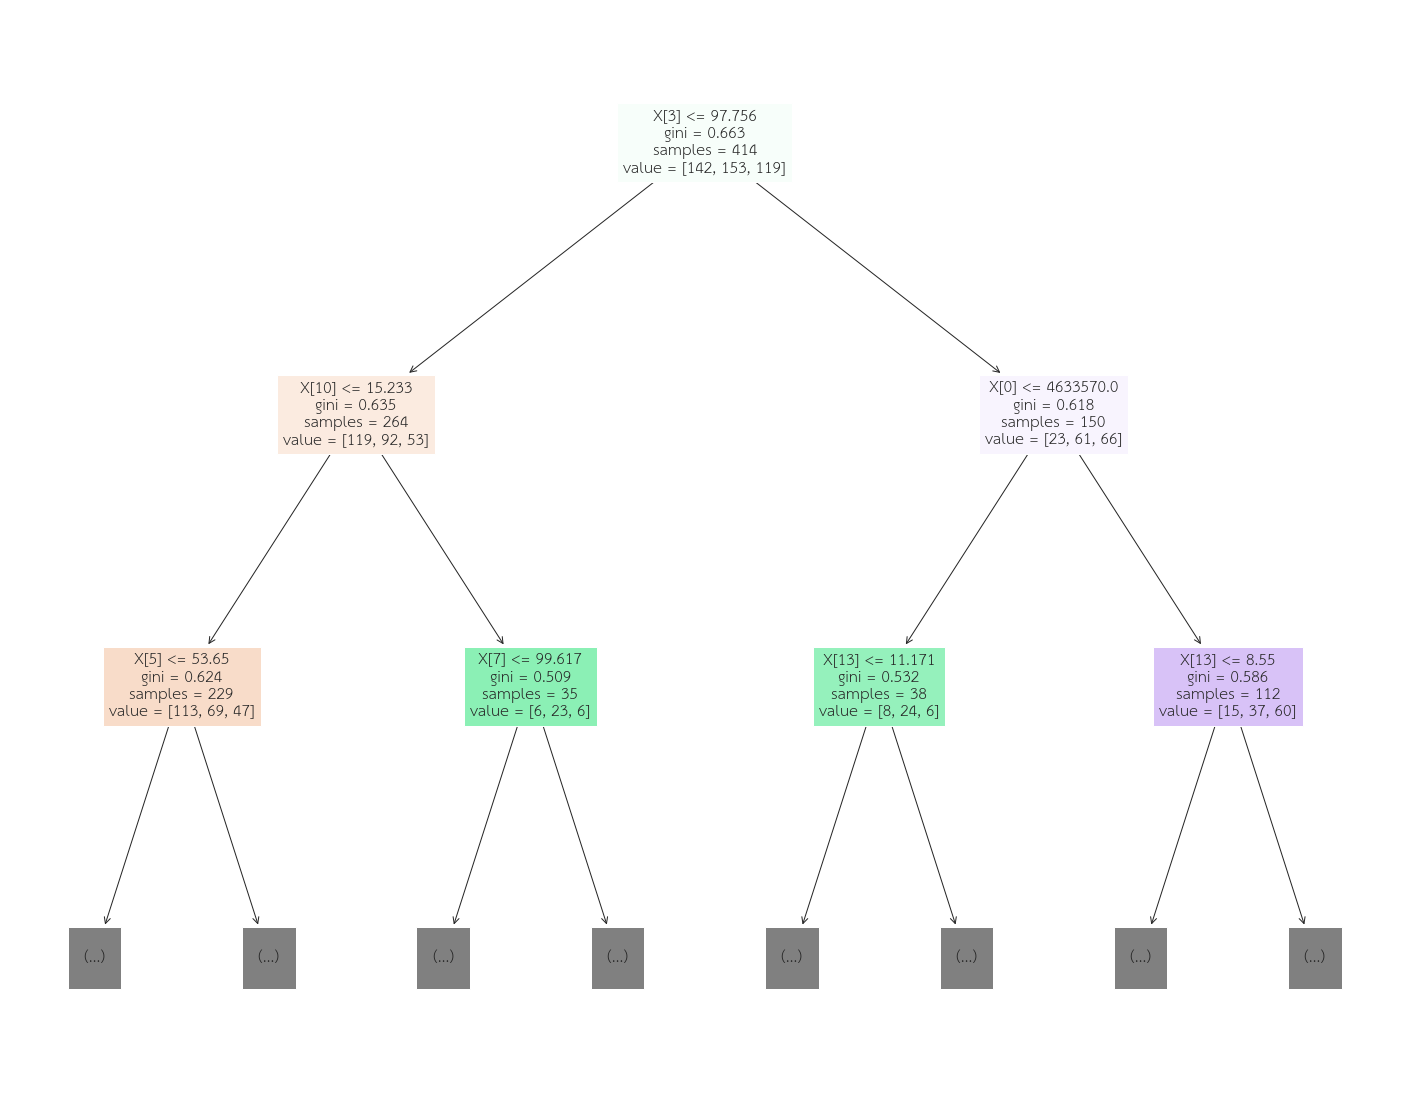

In [147]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, max_depth=2,filled=True)
plt.show()

In [148]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2,
       0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1])

In [149]:
print(confusion_matrix(y_test,y_predicted))

[[29 12  7]
 [ 8 32  9]
 [ 7 13 26]]


In [150]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63        48
           1       0.56      0.65      0.60        49
           2       0.62      0.57      0.59        46

    accuracy                           0.61       143
   macro avg       0.61      0.61      0.61       143
weighted avg       0.61      0.61      0.61       143



In [151]:
res1 = pd.DataFrame({"Result_test": y_predicted})
res1

,Result_test
0,0
1,0
2,1
3,1
4,0
...,...
138,2
139,2
140,2
141,2


In [152]:
toEx1 = df_country.join(res1["Result_test"])
toEx1 = toEx1.sort_values(by=['Happiness'])
toEx1

,country,Happiness,Result_test
0,Afghanistan,0,0
81,Malta,0,1
80,Mali,0,0
75,Libya,0,0
74,Liberia,0,0
...,...,...,...
11,Belgium,2,2
112,Sierra Leone,2,0
29,Costa Rica,2,2
116,South Africa,2,1


In [153]:
toEx1.to_excel("process_data/part3_1_result_all.xlsx")

# Filter Methods

### Missing Value Ratio

<AxesSubplot:>

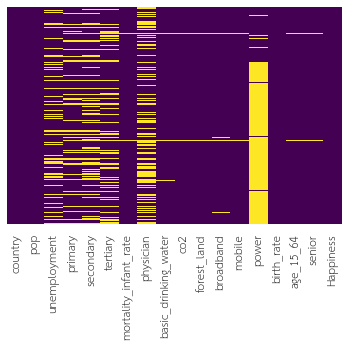

In [154]:
sns.heatmap(df_dummy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [155]:
# Find missing value percent for each variable
null_percent = df_dummy.isnull().sum()/len(df_dummy)*100
null_percent

country                   0.000000
pop                       0.000000
unemployment             25.673250
primary                  16.696589
secondary                27.468582
tertiary                 24.416517
mortality_infant_rate     1.256732
physician                35.727110
basic_drinking_water      1.615799
co2                       1.256732
forest_land               1.256732
broadband                 3.770197
mobile                    0.718133
power                    77.199282
birth_rate                0.000000
age_15_64                 0.718133
senior                    0.718133
Happiness                 0.000000
dtype: float64

drop power, physician ทิ้งเพราะ nan เกิน 30 % ที่เหลือแทนด้วย 0

In [156]:
df_train2 = df_train.drop(["physician","power"],axis=1)
df_train2.head()

,country,pop,unemployment,primary,secondary,tertiary,mortality_infant_rate,basic_drinking_water,co2,forest_land,broadband,mobile,birth_rate,age_15_64,senior,Happiness
0,Afghanistan,33370804,7.91,105.919708,52.582901,8.230680,55.2,58.659374,0.234037,1.850994,0.004495,55.159515,35.706,51.907836,2.451575,0
1,Albania,2889104,18.05,104.108040,97.684868,65.782967,8.8,93.020056,1.806789,28.750511,7.180321,115.997935,12.259,68.599025,12.180692,0
2,Algeria,38923688,10.21,118.502808,0.000000,34.481819,21.9,93.192351,3.566209,0.818057,4.109816,111.238610,25.538,66.002598,5.733120,2
3,Angola,26941773,9.58,0.000000,0.000000,0.000000,60.5,53.541507,1.285365,56.098301,0.325702,52.158983,43.182,50.519797,2.303044,0
4,Argentina,42669500,7.27,111.459671,106.035561,80.995811,10.8,98.909320,4.216361,10.713819,15.290428,143.615832,17.698,64.015470,10.616401,2


In [157]:
df_test2 = df_test.drop(["physician","power"],axis=1)
df_test2.head()

,country,pop,unemployment,primary,secondary,tertiary,mortality_infant_rate,basic_drinking_water,co2,forest_land,broadband,mobile,birth_rate,age_15_64,senior,Happiness
0,Afghanistan,36296111,11.18,102.175789,53.643200,0.000000,49.6,66.808703,0.203328,1.850994,0.025297,65.929134,33.211,53.763223,2.554251,0
1,Albania,2873457,13.62,107.046600,95.265892,57.375259,8.4,94.102097,1.948872,28.792062,10.526845,125.710352,11.934,68.642614,13.329073,0
2,Algeria,41389174,13.57,111.764481,0.000000,47.646832,20.9,93.831977,3.505748,0.815790,7.756294,110.767246,24.846,64.183205,6.177205,1
3,Argentina,44044811,8.35,109.741463,108.733597,89.958519,9.2,0.000000,4.089472,10.559837,17.849997,140.877124,17.205,64.083523,10.989707,1
4,Armenia,2944789,17.70,94.083519,0.000000,52.251530,11.6,99.935128,1.806581,11.559536,10.707687,118.464231,14.298,68.448966,11.096645,0


In [158]:
df_dummy2 = df_dummy.drop(["physician","power"],axis=1).fillna(0)
df_dummy2.head()

,country,pop,unemployment,primary,secondary,tertiary,mortality_infant_rate,basic_drinking_water,co2,forest_land,broadband,mobile,birth_rate,age_15_64,senior,Happiness
0,Afghanistan,33370804,7.91,105.919708,52.582901,8.230680,55.2,58.659374,0.234037,1.850994,0.004495,55.159515,35.706,51.907836,2.451575,0
1,Albania,2889104,18.05,104.108040,97.684868,65.782967,8.8,93.020056,1.806789,28.750511,7.180321,115.997935,12.259,68.599025,12.180692,0
2,Algeria,38923688,10.21,118.502808,0.000000,34.481819,21.9,93.192351,3.566209,0.818057,4.109816,111.238610,25.538,66.002598,5.733120,2
3,Angola,26941773,9.58,0.000000,0.000000,0.000000,60.5,53.541507,1.285365,56.098301,0.325702,52.158983,43.182,50.519797,2.303044,0
4,Argentina,42669500,7.27,111.459671,106.035561,80.995811,10.8,98.909320,4.216361,10.713819,15.290428,143.615832,17.698,64.015470,10.616401,2


### Low Variance Filtering

In [159]:
input_vars = list(df_dummy2.columns)
input_vars.remove("Happiness")
input_vars.remove("country")

In [160]:
len(input_vars)

14

In [161]:
input_vars

['pop',
 'unemployment',
 'primary',
 'secondary',
 'tertiary',
 'mortality_infant_rate',
 'basic_drinking_water',
 'co2',
 'forest_land',
 'broadband',
 'mobile',
 'birth_rate',
 'age_15_64',
 'senior']

In [162]:
df_dummy[input_vars].var().sort_values()

co2                      2.336310e+01
unemployment             3.278554e+01
senior                   4.074706e+01
age_15_64                4.421173e+01
birth_rate               1.078733e+02
primary                  1.320351e+02
broadband                1.878769e+02
basic_drinking_water     2.879051e+02
forest_land              4.312295e+02
mortality_infant_rate    4.595566e+02
tertiary                 7.936627e+02
secondary                9.078075e+02
mobile                   1.244338e+03
pop                      2.700968e+16
dtype: float64

In [163]:
min_var_threshold = 180
updated_vars = [ ]
for i in range(0,len(df_dummy[input_vars].var())):
    if df_dummy[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df_dummy[input_vars].columns[i])
updated_vars

['pop',
 'secondary',
 'tertiary',
 'mortality_infant_rate',
 'basic_drinking_water',
 'forest_land',
 'broadband',
 'mobile']

In [164]:
len(updated_vars)

8

In [165]:
#dicision tree
X_train = df_train[updated_vars]
y_train = df_train[list1[-1]]
X_test = df_test[updated_vars]
y_test = df_test[list1[-1]]

In [166]:
# Can change value of random_state on your own
random_state_val = 99
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)

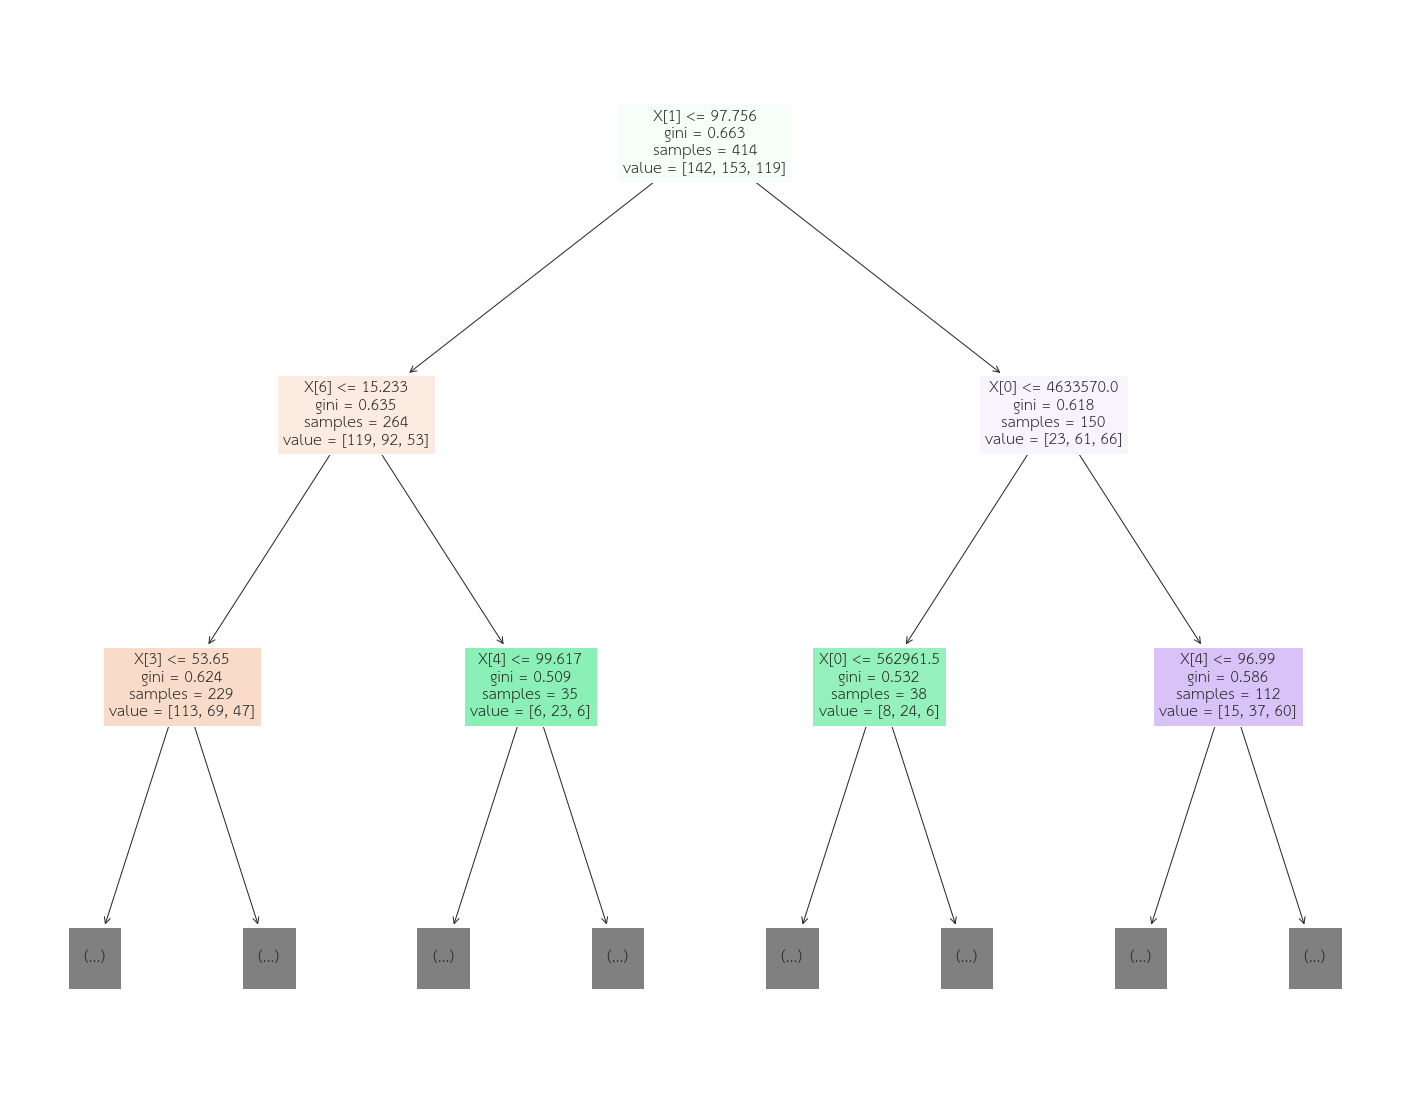

In [167]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, max_depth=2,filled=True)
plt.show()

In [168]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1,
       1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1])

In [169]:
print(confusion_matrix(y_test,y_predicted))

[[33  9  6]
 [ 6 37  6]
 [ 9 12 25]]


In [170]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        48
           1       0.64      0.76      0.69        49
           2       0.68      0.54      0.60        46

    accuracy                           0.66       143
   macro avg       0.67      0.66      0.66       143
weighted avg       0.67      0.66      0.66       143



In [171]:
res2 = pd.DataFrame({"Result_test": y_predicted})
res2

,Result_test
0,0
1,0
2,2
3,1
4,0
...,...
138,2
139,2
140,2
141,2


In [172]:
toEx2 = df_country.join(res2["Result_test"])
toEx2 = toEx2.sort_values(by=['Happiness'])
toEx2

,country,Happiness,Result_test
0,Afghanistan,0,0
81,Malta,0,2
80,Mali,0,0
75,Libya,0,0
74,Liberia,0,0
...,...,...,...
11,Belgium,2,2
112,Sierra Leone,2,0
29,Costa Rica,2,0
116,South Africa,2,1


In [173]:
toEx2.to_excel("process_data/part3_1_result_feature.xlsx")